In [1]:
# define a corpus
corpus = [
    "This is my first corpus",
    "Processing it for ML",
    "Doing ML is awesome",
    "This is fun to look at",
    "ML is life, ML is interest"
]

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [2]:
# fit the corpus with the vectorizer
x = cv.fit_transform(corpus)
x

<5x17 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [3]:
# get the vectors from the vectorizer
x.toarray()

array([[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0]], dtype=int64)

In [8]:
cv.get_feature_names()

['at',
 'awesome',
 'corpus',
 'doing',
 'first',
 'for',
 'fun',
 'interest',
 'is',
 'it',
 'life',
 'look',
 'ml',
 'my',
 'processing',
 'this',
 'to']

In [6]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
Text = ['Loving the product, very happy!', 'Happy with the new buy, love it so much:)', 'The package was missing a part, sooo mad']
df = pd.DataFrame({'Text': Text, 'Label': [1,1,0]})
df.head()

,Label,Text
0,1,"Loving the product, very happy!"
1,1,"Happy with the new buy, love it so much:)"
2,0,"The package was missing a part, sooo mad"


In [7]:
df['Text'].str.get_dummies(' ')

,Happy,Loving,The,a,"buy,",happy!,it,love,mad,missing,...,new,package,"part,","product,",so,sooo,the,very,was,with
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1,0,0,0,1,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,1,1,0,0,0,0,1,1,...,0,1,1,0,0,1,0,0,1,0


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit_transform(df.Text).toarray()
cv.get_feature_names()
pd.DataFrame(cv.fit_transform(df.Text).toarray(), columns=cv.get_feature_names())

,buy,happy,it,love,loving,mad,missing,much,new,package,part,product,so,sooo,the,very,was,with
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0


String Cleaning

    Extract only the alphabets or alphanumeric. Also convert everything to lower case.
    
Removing stopwords (nltk)

    The countVectorizer returns the count of each and every word. Some of them (the, this, was, with) are not very relevant and do not convey any information. 

Stemming 

    CV considers words like love and loving to be two different even though they are same.

In [15]:
df

,Label,Text
0,1,"Loving the product, very happy!"
1,1,"Happy with the new buy, love it so much:)"
2,0,"The package was missing a part, sooo mad"


In [21]:
df['Text'] = df['Text'].str.lower().str.replace('[^a-z]', ' ').str.split()
df

,Label,Text
0,1,"[loving, the, product, very, happy]"
1,1,"[happy, with, the, new, buy, love, it, so, much]"
2,0,"[the, package, was, missing, a, part, sooo, mad]"


In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

df['Text'] = df['Text'].apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Label,Text
0,1,"[loving, product, happy]"
1,1,"[happy, new, buy, love, much]"
2,0,"[package, missing, part, sooo, mad]"


In [36]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
x=['loving', 'product', 'happy','happiness',]
z=[ps.stem(word) for word in x]
print(z)
' '.join(z)
#df['Text'] = df['Text'].apply(lambda x: ' '.join([ps.stem(word) for word in x]))
#df

['love', 'product', 'happi', 'happi']


'love product happi happi'

In [48]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
wordnet_lemmatizer.lemmatize('dogs')

'dog'

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
pd.DataFrame(cv.fit_transform(df.Text).toarray(), columns=cv.get_feature_names())

,buy,happi,love,mad,miss,much,new,packag,part,product,sooo
0,0,1,1,0,0,0,0,0,0,1,0
1,1,1,1,0,0,1,1,0,0,0,0
2,0,0,0,1,1,0,0,1,1,0,1


### Loading data

In [65]:
# read dataframe
spam_df = pd.read_csv("D:/work/DigitalVidya/python/Common Datasets/spam.csv", encoding='ISO-8859-1', engine='c')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [66]:
# select the required coolumns
spam_df = spam_df[['v1', 'v2']]
spam_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)


In [63]:
spam_df.shape

(5572, 2)

### Analyzing the text data

In [51]:
from wordcloud import WordCloud

In [52]:
spam_list = spam_df[spam_df["target"] == "spam"]["text"].unique().tolist()
spam_list[:2]

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"]

In [53]:
spam = " ".join(spam_list)
spam[:100]

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr'

In [55]:
# create a word cloud for spam
spam_wordcloud = WordCloud().generate(spam)

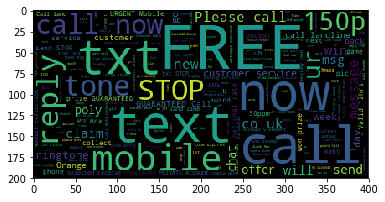

In [56]:
# show the created image of word cloud
plt.figure()
plt.imshow(spam_wordcloud)
plt.show()

### Tokenizing text

#### Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that converts text data to feature vectors

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()

spam_df['text'] = spam_df['text'].str.lower().str.replace('[^a-z]', ' ').str.split()
spam_df['text'] = spam_df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))

spam_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [67]:
# import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create an instance
count_vect = CountVectorizer()
# fit the vectorizer with data
count_vect.fit(spam_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [68]:
# convert text to vectors
X = count_vect.transform(spam_df.text).toarray()

In [69]:
X.shape

(5572, 8672)

In [73]:
X[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Encoding the text

In [74]:
# encode the target strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(spam_df.target)
y[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [133]:
y.shape

(5572,)

In [134]:
le.classes_

array(['ham', 'spam'], dtype=object)

## Naive Bayes

In [75]:
# import Nauve bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [76]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [28]:
X_train.shape

(4179, 6221)

In [29]:
X_test.shape

(1393, 6221)

In [30]:
# fit the classifier model
clf = MultinomialNB()

In [31]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [33]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.97918162239770279

### Comparing actual and predicted labels

In [34]:
# select 20 records
test_data = spam_df.head(10).text.tolist() + spam_df.tail(10).text.tolist()
actual_label = spam_df.head(10).target.tolist() + spam_df.tail(10).target.tolist()

len(test_data)

20

In [35]:
test_preds = clf.predict(count_vect.transform(test_data))
test_preds.shape

(20,)

In [36]:
# print actual vs predicted
i = 0
for sms, label in zip(test_data, actual_label):
    print(str(test_data[i][:50]) +" ("+ str(actual_label[i]) +") => "+ str(test_preds[i]) )
    i += 1

go jurong point crazi avail bugi n great world la  (ham) => 0
ok lar joke wif u oni (ham) => 0
free entri wkli comp win fa cup final tkt st may t (spam) => 1
u dun say earli hor u c alreadi say (ham) => 0
nah think goe usf live around though (ham) => 0
freemsg hey darl week word back like fun still tb  (spam) => 1
even brother like speak treat like aid patent (ham) => 0
per request mell mell oru minnaminungint nurungu v (ham) => 0
winner valu network custom select receivea prize r (spam) => 1
mobil month u r entitl updat latest colour mobil c (spam) => 1
ok lor soni ericsson salesman ask shuhui say quit  (ham) => 0
ard like dat lor (ham) => 0
wait til least wednesday see get (ham) => 0
huh lei (ham) => 0
remind get pound free call credit detail great off (spam) => 1
nd time tri contact u u pound prize claim easi cal (spam) => 1
b go esplanad fr home (ham) => 0
piti mood suggest (ham) => 0
guy bitch act like interest buy someth els next we (ham) => 0
rofl true name (ham) => 0


## Decision Tree

In [37]:
# import the DT classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')

In [38]:
# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [40]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.97415649676956206

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)

In [50]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [52]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.97056712132089018

## SVM 

In [88]:
# import the SVC 
from sklearn.svm import SVC
clf = SVC()

In [89]:
# fit the classifier
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [91]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.85857860732232594